# PyPlot Animation with MultibodyPlant Tutorial
For instructions on how to run these tutorial notebooks, please see the [index](./index.ipynb).


## Selecting matplotlib Backends

Jupyter notebooks provide the `%matplotlib` that we will use to select
different backends:
https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

Generally, the backends you can use are either non-interactive (e.g. `inline`)
or interactive (`notebook`, `tk`). This notebook shows some options you can
comment and uncomment to try them out.

**Note: We recommend using only the `inline` backend on Deepnote and Google Colab.**

First, show what options might be available. Note that some of these backends
may not have all dependencies installed, so they may not work.

In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


Now select **one** of the backends here. These options are more likely
to be supported on your system.

Note that you can only select a different backend once during a kernel session.
If you want to change backends, you will need to restart your session.

In [2]:
# This is non-interactive: it shows static plots inline
%matplotlib inline

# This is interactive: it shows dynamic plots in the notebook
# %matplotlib notebook

# This is interactive: it shows dynamic plots in separate GUI windows
# %matplotlib tk

## Imports

In [3]:
from IPython.display import HTML
from matplotlib import animation
import numpy as np

In [4]:
from pydrake.multibody.parsing import Parser
from pydrake.multibody.plant import AddMultibodyPlantSceneGraph
from pydrake.systems.analysis import Simulator
from pydrake.systems.framework import DiagramBuilder
from pydrake.systems.planar_scenegraph_visualizer import (
    ConnectPlanarSceneGraphVisualizer)

## Define Pendulum Example

This function is consolidated from `run_planar_scenegraph_visualizer.py`.

In [5]:
def run_pendulum_example(duration=1., playback=True, show=True):
    """
    Runs a simulation of a pendulum.

    Arguments:
        duration: Simulation duration (sec).
        playback: Enable pyplot animations to be produced.
    """
    builder = DiagramBuilder()
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, 0.)
    parser = Parser(builder)
    parser.AddModels(
        url="package://drake/examples/pendulum/Pendulum.urdf")
    plant.Finalize()

    T_VW = np.array([[1., 0., 0., 0.],
                     [0., 0., 1., 0.],
                     [0., 0., 0., 1.]])
    visualizer = ConnectPlanarSceneGraphVisualizer(
        builder, scene_graph, T_VW=T_VW, xlim=[-1.2, 1.2],
        ylim=[-1.2, 1.2], show=show)
    if playback:
        visualizer.start_recording()

    diagram = builder.Build()
    simulator = Simulator(diagram)
    simulator.Initialize()
    simulator.set_target_realtime_rate(1.)

    # Fix the input port to zero.
    plant_context = diagram.GetMutableSubsystemContext(
        plant, simulator.get_mutable_context())
    plant.get_actuation_input_port().FixValue(
        plant_context, np.zeros(plant.num_actuators()))
    plant_context.SetContinuousState([0.5, 0.1])
    simulator.AdvanceTo(duration)

    if playback:
        visualizer.stop_recording()
        ani = visualizer.get_recording_as_animation()
        return ani
    else:
        return None

## Run without Playback

If you have a non-interactive backend, you will not see any animation.
Additionally, you will see a UserWarning that it is using a non-GUI backend.

If you have an interactive backend, you should see the simulation animation
as it happens.

If you select a GUI option, this will open a new figure each time you run the
following cell.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


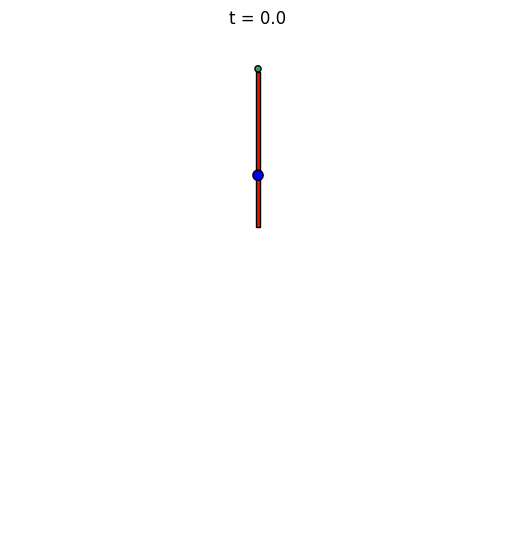

In [6]:
run_pendulum_example(playback=False)

## Run with Playback

If you have a non-interactive backend, you will not see any animation
in the first output.

If you have an interactive backend, you will see animation in the first output
(as the simulation happens). Additionally, the direct animation plot itself will
loop its playback.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


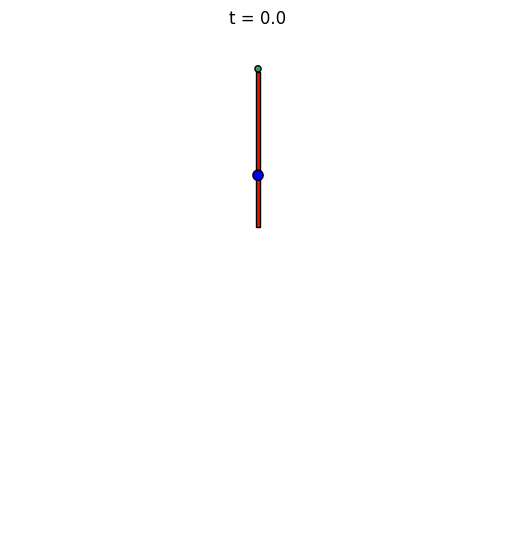

In [7]:
ani = run_pendulum_example(playback=True)

Given that you recorded playback, now you can produce an animation (regardless
of your backend) either as:

* A JavaScript HTML widget - allows for slightly finer-grained control
* An HTML5 video - requires ffmpeg, which is not installed as part of Drake's
dependencies

In [8]:
HTML(ani.to_jshtml())

In [9]:
if animation.writers.is_available("ffmpeg"):
    display(HTML(ani.to_html5_video()))

If you do not want to render the image (only the animation), then pass `show=False` in to the constructor of `PlanarSceneGraphVisualizer()`.

In [10]:
ani = run_pendulum_example(playback=True, show=False)
HTML(ani.to_jshtml())

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
